In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim #Hacer animaciones

In [16]:
#Clase partícula
class Particle():
    
    #Constructor de la clase
    def __init__(self, r0, v0, a0, t, m, radius, Id):
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
       
    #Llenando las posiciones
    def SetPosition(self,i,r):
        self.rVector[i] = r
    
    #Llenando las velocidades
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    #Llenando las aceleraciones
    def SetAceleration(self,i,a):
        self.aVector[i] = a
    
    #Método
    def Evolution(self,i):
        
        #Setteando las poisiciones y velocidades
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
        #Método de Euler
        self.r = self.r + self.dt * self.v
        self.v = self.v + self.dt * self.a

      
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    
    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    
    #¿Qué pasa si choca?
    def CheckWallLimits(self,limits,dim=2):
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]*0.1
                #Pérdida de energía 
                
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]*0.1
                #Pérdida de energía
        
                
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                

In [17]:
def GetParticles(NParticles, Limits, Velo, Dim = 2, dt=0.01):
    
    Particles_ = [ ]
    
    for i in range(NParticles):
        
        r0 = np.array([-15, 5]) 
        v0 = np.array([1,0])
        a0 = np.array([0, -9.8])
        
        p = Particle(r0, v0, a0, t, 1.0, 1.0, i)
        
        Particles_.append(p)
    
    return Particles_

In [18]:
def RunSimulation(t, NParticles, Velo):
    
    Particles = GetParticles(NParticles, Limits[0], Velo = Velo, dt = dt)
    
    for it in tqdm(range(len(t))): #Evolución temporal que define la simulación en un tiempo t
        for i in range(len(Particles)):
            
            Particles[i].Evolution(it)
            Particles[i].CheckWallLimits(Limits)
            
    return Particles

In [19]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [20]:
#Definición de los atributos

dt = 0.01 #Paso temporal
tmax= 30 #Tiempo máximo
t = np.arange(0, tmax+dt, dt) #Array de tiempos

Limits = np.array([20, 20]) #Límites de la caja

#Creamos las partículas
Particles = RunSimulation(t, 1, Velo = 10)

redt = ReduceTime(t,10) #Reducción del tiempo

100%|██████████| 3001/3001 [00:00<00:00, 23310.88it/s]


<IPython.core.display.Javascript object>


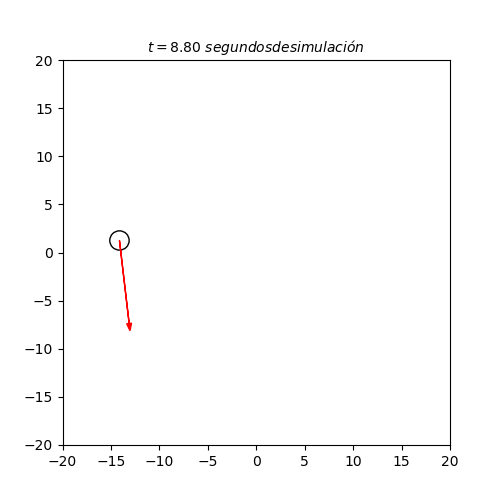

In [25]:
redt = ReduceTime(t,10)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ segundos de simulación$' %(redt[i]), fontsize=10)
    
    for p in Particles:
        x = p.GetPositionVector()[i,0]
        y = p.GetPositionVector()[i,1]
        
        vx = p.GetVelocityVector()[i,0]
        vy = p.GetVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
        plot = ax.add_patch(circle)
        plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)


In [ ]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation.save('FallingBall1.mp4', writer=writer_)

In [7]:
def ObtenerVelocidad(Particles, t):
    
    magnitudVelocidad = np.zeros(len(t))
    
    for time in range(len(t)): 
        
        for p in Particles:
            
            v_x = p.GetVelocityVector()[time,0]
            v_y = p.GetVelocityVector()[time,1]
        
            magnitudVelocidad[time] = np.sqrt(v_x**2 + v_y**2)
    
    return magnitudVelocidad

In [8]:
def ObtenerEnergíaCinética(Particles, t):
    
    velocidadCuadrada = ObtenerVelocidad(Particles, t)**2
    
    #Si asumimos que la masa es de 1kg
    energiaCinetica = 0.5*velocidadCuadrada
    
    return energiaCinetica

In [9]:
def ObtenerEnergíaPotencial(Particles, t):
    
    altura = np.zeros(len(t))
    
    for time in range(len(t)): 
        
        for p in Particles:
            
            altura[time] = p.GetPositionVector()[time,1]
    
    
    #Si asumimos que la masa es de 1kg y la gravedad de 9.8m/s^2
    energiaPotencial = 9.8*altura
    
    return energiaPotencial

<IPython.core.display.Javascript object>


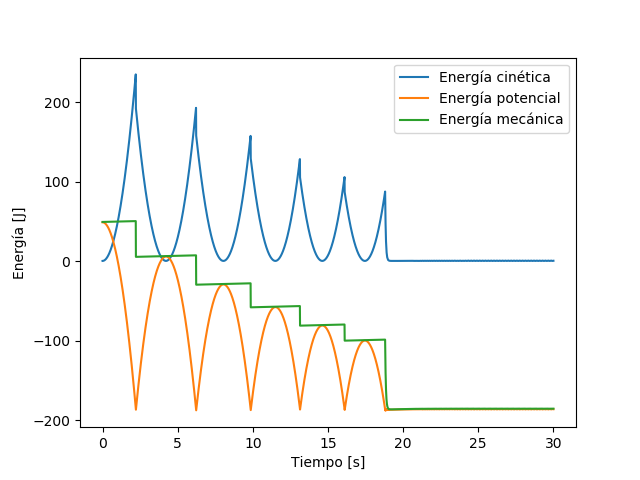

In [10]:
#Graficas de las energías

#Energía cinética
energiaCinetica = ObtenerEnergíaCinética(Particles, t)
plt.plot(t, energiaCinetica, label = "Energía cinética")
plt.xlabel("Tiempo [s]")

#Energía potencial
energiaPotencial = ObtenerEnergíaPotencial(Particles, t)
plt.plot(t, energiaPotencial, label = "Energía potencial")
plt.xlabel("Tiempo [s]")


#Energía mecánica
energiaMecanica = energiaPotencial + energiaCinetica
plt.plot(t, energiaMecanica, label = "Energía mecánica")
plt.xlabel("Tiempo [s]")


plt.ylabel("Energía [J]")
plt.legend()
plt.show()

In [14]:
#¿Qué tiempo tarda la pelota en dejar de rebotar? Más o menos, sería en el límite cuando la magnitud de la velocidad tienda a cero, entonces

def TiempoQueTarda(Particles, t):
    
    tiempoTarda = 0 
    velocidades = ObtenerVelocidad(Particles, t)
    
    n = 100
    
    #Altura inicial
    h0 = Particles[0].GetPositionVector()[0,1]
    t0 = np.sqrt(2*h0/9.8)
    tiempoTarda += t0
    
    e = 0.9
    
    for i in range(1,n):
         
        tiempoTarda += 2*np.sqrt((2*h0)/9.8)*(e**(i))
        
    return tiempoTarda
        
        

In [13]:
#Tiempo que tarda
tqt = TiempoQueTarda(Particles, t)
print("El tiempo que tarda en parar es de {:.2f} segundos.".format(tqt))

El tiempo que tarda en parar es de 19.19 segundos.
